In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("final_pbd.csv", names=['price', 'weight'], sep=';')

df.head()

,price,weight
0,400,15.0
1,450,12.2
2,620,10.5
3,750,14.3
4,900,12.3


In [4]:
# number of elements dominating dom[n]
df['dom'] = 0

df.head()

,price,weight,dom
0,400,15.0,0
1,450,12.2,0
2,620,10.5,0
3,750,14.3,0
4,900,12.3,0


In [5]:
%%time

# holds lists of elements dominated by each element
dominates = []
fronts = [[]]

# finding the first front
for i in df.index.values:
    dominates.append([])
    isDominant = True
    for j in df.index.values:
        if i == j:
            continue
        # if i dominates j
        if df['weight'][i] < df['weight'][j] and df['price'][i] < df['price'][j]:
            dominates[i].append(j)
        # else if i is dominated by j
        elif df['weight'][j] < df['weight'][i] and df['price'][j] < df['price'][i]:
            df.loc[i, 'dom'] += 1
    if df.loc[i, 'dom'] == 0:
        fronts[0].append(i)
    
# front number
i = 0

while len(fronts[i]) != 0:
    newfront = []
    for p in fronts[i]:
        for q in dominates[p]:
            df.loc[q, 'dom'] -= 1
            if df.loc[q, 'dom'] == 0:
                newfront.append(q)
    fronts.append(newfront)
    i += 1

CPU times: total: 15.6 ms
Wall time: 15.5 ms


In [6]:
for i in range(len(fronts)):
    print("elements in Pareto front {}:".format(i+1), fronts[i])

elements in Pareto front 1: [0, 1, 2, 6, 7, 13, 16, 18, 20]
elements in Pareto front 2: [3, 4, 8, 12, 17, 19]
elements in Pareto front 3: [5, 9, 11, 14]
elements in Pareto front 4: [10, 15]
elements in Pareto front 5: []


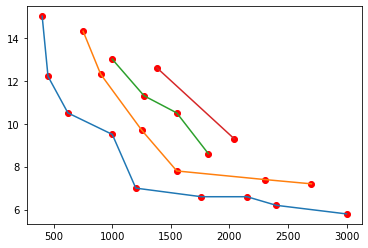

In [7]:
# plotting the original points
x = df['price'].values
y = df['weight'].values
plt.plot(x, y, 'ro')

# plotting the fronts
for f in fronts:
    pfx = df.loc[f]['price'].values
    pfy = df.loc[f]['weight'].values
    plt.plot(pfx, pfy)

plt.show()